# **Análise Exploratória de um Dataset de Casas para Alugar**










**Dataset name:** *houses_to_rent_v2.csv*


**Número de linhas:** *10962 (número total de imóveis disponíveis para aluguel)*

**Número de cidades**: *5*

**Data dos dados:**  *20/03/2020*


In [98]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

In [99]:
#upload do arquivo com os dados as serem analisados
from google.colab import files 
arq = files.upload()

Saving houses_to_rent_v2.csv to houses_to_rent_v2 (1).csv


In [100]:
#criando o dataframe
df = pd.read_csv("houses_to_rent_v2.csv")

In [101]:
#visualizando amostra dos dados
df.head(3)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841


In [102]:
#explorando a estrutura
df.shape

(10692, 13)

In [103]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [104]:
#realizando alguns tratamentos
df = df.rename(columns={"city":"Cidade", "rooms":"Quartos", "bathroom":"Banheiros", "parking spaces":"VagasEst", "floor":"Andar", "animal":"Pets","furniture":"Mobiliado","hoa (R$)":"Condominio", "rent amount (R$)":"Aluguel", "property tax (R$)":"IPTU", "fire insurance (R$)":"Seg Incendio"})

In [105]:
df.columns

Index(['Cidade', 'area', 'Quartos', 'Banheiros', 'VagasEst', 'Andar', 'Pets',
       'Mobiliado', 'Condominio', 'Aluguel', 'IPTU', 'Seg Incendio',
       'total (R$)'],
      dtype='object')

In [106]:
df.head(2)

,Cidade,area,Quartos,Banheiros,VagasEst,Andar,Pets,Mobiliado,Condominio,Aluguel,IPTU,Seg Incendio,total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973


In [107]:
df.tail(2)

,Cidade,area,Quartos,Banheiros,VagasEst,Andar,Pets,Mobiliado,Condominio,Aluguel,IPTU,Seg Incendio,total (R$)
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


**Realizando algumas análises**

In [108]:
#Informações estatíticas do meu dataset
df.describe()

,area,Quartos,Banheiros,VagasEst,Condominio,Aluguel,IPTU,Seg Incendio,total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [109]:
#Conhecendo a minha base de dados
df["Cidade"].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [110]:
#Fatiando os dados
SaoPaulo = df.loc[df["Cidade"] == "São Paulo"]
PortoAlegre = df.loc[df["Cidade"] == "Porto Alegre"]
RioJaneiro = df.loc[df["Cidade"] == "Rio de Janeiro"]
Campinas = df.loc[df["Cidade"] == "Campinas"]
BeloHorizonte = df.loc[df["Cidade"] == "Belo Horizonte"]

In [111]:
BeloHorizonte.head(1)
BeloHorizonte["Cidade"].unique()

array(['Belo Horizonte'], dtype=object)

In [112]:
#verificando qual cidade tem mais ofertas de aluguel - análise simples sem considerar tamanho da cidade, população e etc
df.groupby("Cidade")["Cidade"].count()

Cidade
Belo Horizonte    1258
Campinas           853
Porto Alegre      1193
Rio de Janeiro    1501
São Paulo         5887
Name: Cidade, dtype: int64

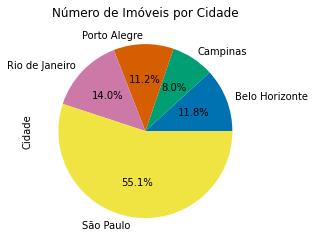

In [114]:
#São Paulo e Rio de Janeiro tem o maior número de imóveis para alugar. Mostrando a mesma informação em um gráfico
df.groupby("Cidade")["Cidade"].count().plot.pie(title="Número de Imóveis por Cidade", autopct='%1.1f%%');

In [115]:
#verificando a média do valor total de aluguel por cidade
df.groupby("Cidade")["total (R$)"].mean()

Cidade
Belo Horizonte    6315.242448
Campinas          3173.276671
Porto Alegre      2989.782900
Rio de Janeiro    4611.684877
São Paulo         6380.831833
Name: total (R$), dtype: float64

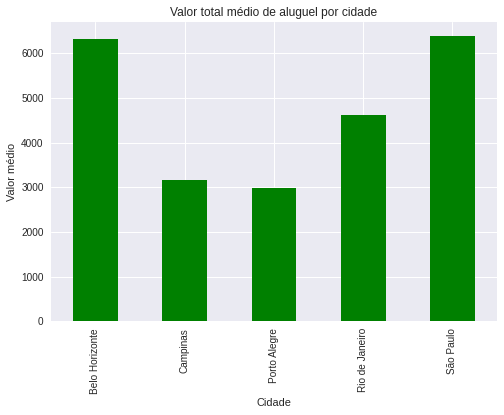

In [116]:
#verificando graficamente a média do valor total de aluguel por cidade, sem considerar as características dos imóveis
plt.style.use("seaborn")
df.groupby("Cidade")["total (R$)"].mean().plot.bar(title="Valor total médio de aluguel por cidade", color="green")
plt.ylabel("Valor médio");

In [117]:
#comparando a aceitação de pets entre as cidades
df.groupby("Cidade")["Pets"].value_counts()

Cidade          Pets     
Belo Horizonte  acept         931
                not acept     327
Campinas        acept         693
                not acept     160
Porto Alegre    acept        1005
                not acept     188
Rio de Janeiro  acept        1205
                not acept     296
São Paulo       acept        4482
                not acept    1405
Name: Pets, dtype: int64

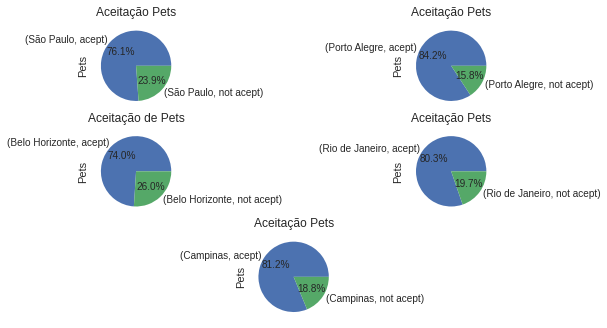

In [118]:
#comparando graficamente
plt.style.use("seaborn")
plt.subplot(331)
SaoPaulo.groupby("Cidade")["Pets"].value_counts().plot.pie(title="Aceitação Pets", autopct='%1.1f%%');
plt.subplot(333)
PortoAlegre.groupby("Cidade")["Pets"].value_counts().plot.pie(title="Aceitação Pets", autopct='%1.1f%%');
plt.subplot(334)
BeloHorizonte.groupby("Cidade")["Pets"].value_counts().plot.pie(title="Aceitação de Pets", autopct='%1.1f%%');
plt.subplot(336)
RioJaneiro.groupby("Cidade")["Pets"].value_counts().plot.pie(title="Aceitação Pets", autopct='%1.1f%%');
plt.subplot(338)
Campinas.groupby("Cidade")["Pets"].value_counts().plot.pie(title="Aceitação Pets", autopct='%1.1f%%');

In [119]:
#apuração do valor médio de IPTU
df.groupby("Cidade")["IPTU"].mean()

Cidade
Belo Horizonte    272.782194
Campinas          147.657679
Porto Alegre      124.021794
Rio de Janeiro    256.853431
São Paulo         495.701716
Name: IPTU, dtype: float64

In [120]:
#apuração do valor médio de Condomínio
df.groupby("Cidade")["Condominio"].mean()

Cidade
Belo Horizonte    2324.197138
Campinas           628.922626
Porto Alegre       491.618609
Rio de Janeiro    1079.432378
São Paulo         1169.627994
Name: Condominio, dtype: float64

In [124]:
#verificando a quantidade de imóveis por número de quartos
QTdImoveisNumQuartos = df.groupby(["Cidade","Quartos"])["Quartos"].count().reset_index(name='QTD Imóveis')
QTdImoveisNumQuartos

,Cidade,Quartos,QTD Imóveis
0,Belo Horizonte,1,150
1,Belo Horizonte,2,286
2,Belo Horizonte,3,389
3,Belo Horizonte,4,317
4,Belo Horizonte,5,78
5,Belo Horizonte,6,20
6,Belo Horizonte,7,13
7,Belo Horizonte,8,4
8,Belo Horizonte,10,1
9,Campinas,1,218


In [131]:
#verificando a quantidade de imoveis com 4 quartos ou menos
QTdImoveisNumQuartos.loc[QTdImoveisNumQuartos["Quartos"] <= 4]

,Cidade,Quartos,QTD Imóveis
0,Belo Horizonte,1,150
1,Belo Horizonte,2,286
2,Belo Horizonte,3,389
3,Belo Horizonte,4,317
9,Campinas,1,218
10,Campinas,2,253
11,Campinas,3,271
12,Campinas,4,91
16,Porto Alegre,1,374
17,Porto Alegre,2,424


In [133]:
#verificando a quantidade de imóveis com 4 dormitórios ou menos
QTdImoveisNumQuartos.loc[QTdImoveisNumQuartos["Quartos"] <= 4].sum()

Cidade         Belo HorizonteBelo HorizonteBelo HorizonteBelo...
Quartos                                                       50
QTD Imóveis                                                10284
dtype: object

In [134]:
#criando um subdataset apenas com os imóveis com 4 dormitórios ou menos - obs.: 10284 imóveis de um total de 10692
subdf = df.loc[df["Quartos"] <= 4]

In [135]:
subdf.sample(10)

,Cidade,area,Quartos,Banheiros,VagasEst,Andar,Pets,Mobiliado,Condominio,Aluguel,IPTU,Seg Incendio,total (R$)
3503,Campinas,47,1,1,1,18,acept,furnished,582,2700,135,35,3452
354,São Paulo,540,3,3,4,9,acept,not furnished,6200,15000,3500,191,24890
1383,São Paulo,170,3,2,4,6,acept,not furnished,3678,1500,1130,20,6328
7851,São Paulo,113,2,2,1,4,acept,not furnished,1000,3000,50,39,4089
5952,São Paulo,70,2,2,1,-,acept,not furnished,0,1650,102,25,1777
3127,São Paulo,70,1,1,0,-,acept,not furnished,0,1200,34,19,1253
4552,São Paulo,170,3,2,2,4,acept,furnished,1970,9000,900,115,11990
7070,Belo Horizonte,136,4,3,1,1,acept,not furnished,347,2300,72,31,2750
6601,São Paulo,216,4,4,4,9,acept,not furnished,1710,2800,686,36,5232
9953,Rio de Janeiro,20,1,1,0,5,acept,not furnished,450,500,63,7,1020


In [136]:
subdf['total (R$)'].describe().apply("{0:.2f}".format)

count      10284.00
mean        5281.67
std        16597.88
min          499.00
25%         2021.00
50%         3447.00
75%         6381.00
max      1120000.00
Name: total (R$), dtype: object

In [137]:
#De acordo co o valor max do total de aluguel nota-se que valores muito discrepantes
subdf.loc[subdf['total (R$)'] > 30000]

,Cidade,area,Quartos,Banheiros,VagasEst,Andar,Pets,Mobiliado,Condominio,Aluguel,IPTU,Seg Incendio,total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40,11,32750
1699,São Paulo,700,4,4,4,-,acept,not furnished,0,10000,21880,151,32040
2182,São Paulo,700,4,7,8,-,acept,not furnished,0,45000,8750,677,54430
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
6185,São Paulo,455,4,5,4,5,acept,not furnished,8500,19500,3334,248,31580
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120,39,32180
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


In [138]:
subdf.loc[subdf['total (R$)'] > 30000].count()

Cidade          11
area            11
Quartos         11
Banheiros       11
VagasEst        11
Andar           11
Pets            11
Mobiliado       11
Condominio      11
Aluguel         11
IPTU            11
Seg Incendio    11
total (R$)      11
dtype: int64

In [139]:
#descartando as linhas com valor de aluguel discrepante - serão descartados imóveis com valores de aluguel acima de 30.000
subdf = subdf.loc[subdf['total (R$)'] < 30000]

In [141]:
#verificando resultado após a limpeza
subdf['total (R$)'].describe().apply("{0:.2f}".format)

count    10273.00
mean      4986.67
std       4284.18
min        499.00
25%       2021.00
50%       3444.00
75%       6368.00
max      28790.00
Name: total (R$), dtype: object

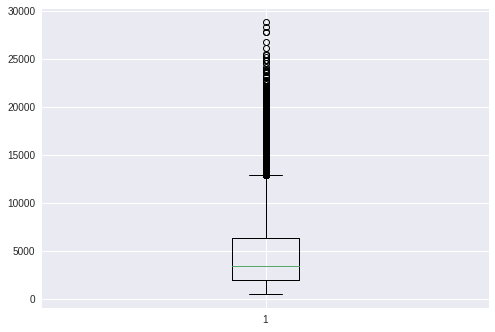

In [142]:
#verificando graficamente 
plt.boxplot(subdf['total (R$)']);

In [143]:
#pelo gráfico anterior é possível que ainda existem muitos valores discrepantes
subdf.loc[subdf['total (R$)'] > 15000]

,Cidade,area,Quartos,Banheiros,VagasEst,Andar,Pets,Mobiliado,Condominio,Aluguel,IPTU,Seg Incendio,total (R$)
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
40,São Paulo,300,4,6,4,20,acept,not furnished,3700,12000,1584,153,17440
86,São Paulo,600,4,4,4,9,acept,not furnished,7400,8500,3368,108,19380
106,São Paulo,300,4,5,4,-,acept,furnished,0,14000,1167,211,15380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620,Rio de Janeiro,400,4,4,2,-,acept,not furnished,2000,15000,917,229,18150
10633,Rio de Janeiro,290,4,4,0,-,acept,not furnished,0,15000,750,229,15980
10669,São Paulo,340,4,5,3,15,not acept,furnished,3519,12000,1287,153,16960
10681,São Paulo,230,3,5,3,3,not acept,not furnished,3800,11000,1100,140,16040


In [148]:
#continuando as análises com a base reduzida - imóveis com 4 dormintórios ou menos
#apuração do valor médio de IPTU
df.groupby("Cidade")["IPTU"].mean()

Cidade
Belo Horizonte    272.782194
Campinas          147.657679
Porto Alegre      124.021794
Rio de Janeiro    256.853431
São Paulo         495.701716
Name: IPTU, dtype: float64

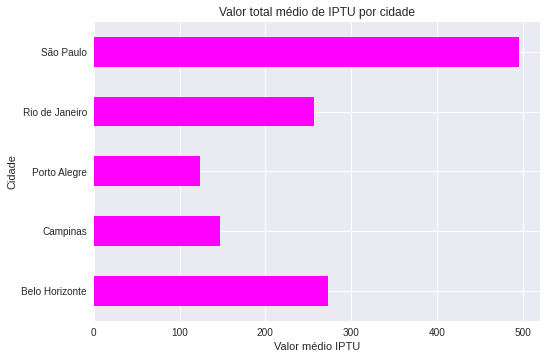

In [151]:
df.groupby("Cidade")["IPTU"].mean().plot.barh(title="Valor total médio de IPTU por cidade", color="magenta")
plt.xlabel("Valor médio IPTU");

In [152]:
#apuração do valor médio de Condomínio - imóveis com 4 dormintórios ou menos
df.groupby("Cidade")["Condominio"].mean()

Cidade
Belo Horizonte    2324.197138
Campinas           628.922626
Porto Alegre       491.618609
Rio de Janeiro    1079.432378
São Paulo         1169.627994
Name: Condominio, dtype: float64

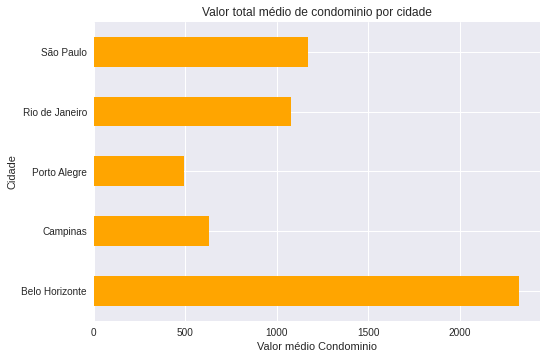

In [153]:
df.groupby("Cidade")["Condominio"].mean().plot.barh(title="Valor total médio de condominio por cidade", color="orange")
plt.xlabel("Valor médio Condominio");

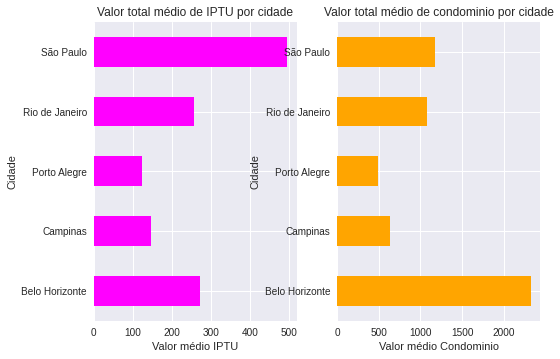

In [177]:
#comparação entre os gastos com IPTU e condomínio
plt.subplot(121)
df.groupby("Cidade")["IPTU"].mean().plot.barh(title="Valor total médio de IPTU por cidade", color="magenta")
plt.xlabel("Valor médio IPTU");
plt.subplot(122)
df.groupby("Cidade")["Condominio"].mean().plot.barh(title="Valor total médio de condominio por cidade", color="orange")
plt.xlabel("Valor médio Condominio");